










































# 0. ANN DNN이란? 

> ANN 
- 사람의 신경망 원리와 구조를 모방하여 만든 기계학습 알고리즘 

> ANN 구성요소 
- 입력층  : n개의 입력값이 있다면 n개의 노드 가짐 
- 출력층  : 출력값 산출 
- 은닉층  : 모든 입력 노드들로부터 입력값을 받아 **`가중합`** 계산 후 **`활성함수`**에 적용하여 출력층에 전달 
- 활성함수 (최적의 weight, bias 찾는 역할) 

> ANN의 문제점 
- 학습과정에서 파라미터의 최적값을 찾기 어려움 
- 오버피팅
- 학습 시간이 너무 느리다 


> DNN 
- ANN의 은닉층을 느려 은닉층을 2개 이상 지닌 학습 방법 

---
# 1. 활성함수 
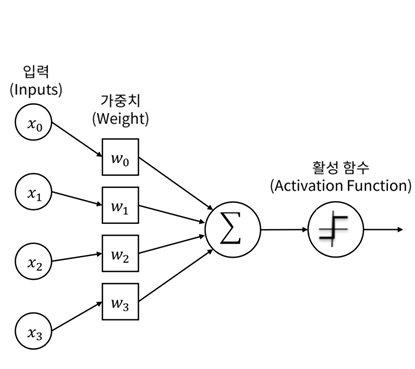
> 활성함수란? 
- 활성함수는 입력 신호의 총합을 출력 신호로 변환하는 함수로, 입력 받은 신호를 얼마나 출력할지 결정하고 네트워크에 층을 쌓아 비선형성을 표현할 수 있다록 해준다 
- 주로 **비선형** : 선형함수를 사용하면 층을 깊게 하는 의미가 줄어들기 때문 
- 선형함수는 선형층을 아무리 쌓아도 여전히 하나의 선형 연산이기 때문에 층을 여러 개로 쌓는 이점이 사라진다. 


## 1.1 시그모이드 함수 

- 출력값 범위 : [0,1] 
- 미분 가능 함수 
- **이진분류** 문제에 자주 사용 
- 0과 1로 강제 출력하는 부분에서는 학습이 잘 이루어지지 않음 = **기울기 소실** 문제 
- **기울기 소실** : 시그모이드를 미분하면 x=0일 때 최대값 1/4를 갖고, 이후 일정 이상 input값이 올라가면 미분값이 거의 0에 수렴한다. => <span style = "color : red ;"> 역전파되는 과정에서 출력값이 현저하게 감소되는 결과 </span> (0에 가까운 값끼리 곱하면 계속 0에 가까워지기에) 

- **Zero-Centered**하지 않기에 학습이 느려질 수 있음 
  - zero-centered : 중심이 0인 형태로 함수값이 양수 혹은 음수에만 치우치지 않고 실수 전체에서 나타나는 형태 
  - Sigmoid함수는 **항상 0봐 크거나 같은 형태** 
  - 따라서 한 번만 거치면 input값이 항상 양수가 됨 => 역전파시 문제가 생김 => 지그재그의 형태로 학습이 될 수밖에 없고 학습이 오래 걸림 


## 1.2 Tanh 

- 출력값 범위 : [-1,1] 
- 시그모이드 함수를 변형한 쌍곡선 함수 
- 미분값 최대값이 1 (시그모이드의 4배) 
- non zero-centered 해결 
- 기울기 소실은 해결 못함 

## 1.3 소프트맥스 함수 

- 출력값 범위 : [0,1] 
- 정규화하여 출력 -> 출력값들의 총합은 항상 1이 됨 
- **다중분류**문제에서 사용함 
- 각 클래스에 속할 확률을 추정함 (시그모이드랑 비슷하지만, 시그모이드는 확률값이 서로 독립적임, 그래서 다중분류에서 사용 못함) 

## 1.4 Relu 함수 

- 제일 많이 사용 
- 대부분의 CNN, 딥러닝에서 사용 
- 장점 
  - Sparsity :  연산량을 월등히 줄여줌, 단 x<0인 값들에 대해서는 기울기가 0이기 때문에 뉴런이 죽을 수 있는 단점 존재 
  - 기울기 소실 어느 정도 해결 : gradient를 상수로 갖게 됨 일정한 gradient 값은 빠르게 학습하는 것을 도와줌 

- 다양한 변형 함수들이 존재 

---

# 2. 손실함수 
> 손실함수란? 
- 예측값과 실제값 사이의 오차 전체의 함수 
- 손실함수값이 최소가 되는 지점을 찾으면 됨 
- 손실함수 = 비용함수, 목적함수, 오차함수 

> MSE 
- 단순회귀분석의 전체 오차 : 제곱오차의 총합 

> Cross- Entropy 
- 최적화 : 손실함수 C가 최솟값이 되도록 가중치와 편향을 결정하는 과정 
- 하지만 MSE를 이 과정에서 쓰기엔 시간이 너무 오래걸림 
- 그래서 이 때 Cross-Entropy를 사용 (**교차 엔트로피**) 
- 정답이랑 비교해서 표현하는 것 


# 3. 경사하강법 
> 경사하강법이란? 

  - **기억할 것!! 오차가 최소가 되는 기울기 값을 구하는 것!!!!**
  - 최소의 기준 : 해당 기울기값의 `미분값이 0`인 것 (아래로 볼록) 
  - 기울기의 미분값이 0이 될 때까지 계속해서 위치를 양수/음수 방향으로 이동하면서 미분값을 구한다. 
  - 그러면 수렴한다 

# 4. 학습률
> 학습률이란? 
 - 경사하강법에서 미분값이 0이 될 때까지 이동하는 `이동 거리`를 정해주는 방법 
 - 제대로 안정해주면? 
  - 수렴하지 않고 위로 솟아버림 
 - 즉, 학습률의 값을 적절히 바꾸면서 최적의 학습률을 찾는 것이 중요한 최적화 과정
=> 그리고 절편 b 구할 때도 경사하강법 사용   

> 적용 과정 

 1) MSE 평균제곱오차식 작성 
 2) y  추정치에 ax + b 넣기 
 3) a와 b로 각각 편미분 진행함 
 4) 편미분한 값이 0이 되는지 확인 
 5) 0이 안되면 미분 결과에 학습률을 곱해 a와 b를 업데이트 함
  - a = a - lr * a_diff 
  - b = b - lr * b_diff


# 5. 로지스틱 회귀 
> 로지스틱 회귀분석이란? 
 - 참 거짓을 나누는 회귀분석 
 - S자 모양의 그래프를 찾는 것 <-> 회귀분석 : 직선 그래프 찾는 것 

> 근데 이 S자 모양의 그래프를 그려주는 함수가 있다!!! 
 - 바로 시그모이드 함수이다 
 - 하지만 시그모이드 함수에도 ax+b가 들어있기에 적절한 a와 b를 알아내야 한다. 

> 그러면 그 적절한 a와 b를 어떻게 구하지? 
 - 똑같이 경사하강법을 사용한다. 
 - 근데 경사하강법은 오차를 작게하는 방법으로 수렴해나가는 것이잖아!! 

> 그러면 시그모이드 함수의 오차는 어떻게 측정해?? 
 - 로그함수로 사용한다! 
 - 시그모이드 오차공식 : 로그함수 <-> 일반 회귀식 : MSE 
 - 로그함수 식은 인터넷 검색하면 나옴 
 



---
> 순전파

> 역전파 

---
# 6. 퍼셉트론 

## 가중치, 가중합, 바이어스, 활성화 함수 
1) 가중치 = 기울기 

2) 바이어스 = y절편

3) 가중합 = x * 가중치 + 바이어스 

4) 활성화 함수 = 가중합의 결과를 가지고 0과 1을 판단하는 함수 
  ex) 시그모이드함수 

# 7. 오차 역전파 
> 오차 역전파란? 
 - 다층 퍼셉트론의 최적화 과정 
 - 즉, 신경망 내부의 가중치(W)를 수정하는 방법 
 - 경사하강법의 확장 방법 

> 과정은? 
- 한 마디로 '기울기가 0이 되는 방향'으로 나아가는 것 
- 즉, 가중치에서 기울기를 빼도 값의 변화가 없을 때(기울기가 0이니깐)까지 계속해서 가중치 수정작업을 반복하는 것이다. 

> 새 가중치는? 
- 새 가중치 = 현 가중치 - '가중치에 대한 기울기(=가중치로 편미분한 값)' 



# 8. 기울기 소실 
> 기울기 소실이란? 
 - 역전파로 가중치를 수정하면서 기울기 값이 점점 잦아져서 맨 처음 층까지 전달되지 않는 문제 

> 왜 생긴 거임? 
 - 활성화 함수 (가중합의 결과를 0과 1로 판단하는함수)로 사용된 시그모이드 함수의 특성 때문 
 - 시그모이드 함수의 미분값의 최대치 = 0.3 => 1보다 작음 => 계속 곱하면 0에 가까워짐 

> 그래서!!! 
 - 시그모이드 대신 다른 여러 함수들을 사용하기 시작 


# 9. 고급 경사 하강법 

> 경사하강법의 단점
 - 한 번 업데이트할 때마다 전체 데이터를 미분해야 함 = 계산량이 많음 

## 9.1 확률적 경사하강법 SGD (속도개선) 

> 확률적 경사하강법이란? 
 - 전체 데이터를 사용하는 것X 랜덤하게 추출한 일부 데이터 사용 
 - 중간 결과의 진폭이 크고 불안정해보임 
 - 하지만, 속도가 빠르면서도 최적 해에 근사한 ㄱ밧을 찾아냄 

> 하는 방법은? 
 - 추가 필요 

## 9.2 모멘텀 SGD (정확도 개선) 
> 모멘텀이란? 
 - 경사하강법에 탄력을 더해주는 것 
 - 오차를 수정할 때, 바로 앞 수정값과 방향을 참고하여 같은 방향으로 일정한 비율만 수정되게 하는 방법 
 - 즉, 지그재그 줄어들고 일정 비율만큼만 다음값 결정 

## 9.3 네스테로프 모멘텀 (정확도 개선)
- 모멘텀이 이동시킬 방향으로 미리 이동해서 그레디언트를 계산 ...? 

## 9.4 Adagrad (보폭 크기 개선) 
- 변수의 업데이트가 잦으면 학습률을 적게하여 이동 보폭을 조절하는 방법 
- 학습률이란? 이동거리를 정해주는 방법 

## 9.5 RMSProp (보폭 크기 개선) 
- 아다그라드의 보폭 민감도를 보완 

## 9.6 Adam (정확도와 보폭 크기 개선) 
- 모멘텀과 알엠에스프롭 방법을 합친 방법 

=> 그래서 아담을 제일 많이 사용하는 것 